# Machine Learning Homework 5 Template

Import some packages

In [8]:
pip install pandas

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
          # not necessary, we will just use some toy dataset in the package
import numpy as np               # numpy
import matplotlib.pyplot as plt  # matplotlib
import pandas as pd
from scipy.special import logsumexp

## Part 1: Introduction to neural networks

In this part, you are not allowed to use machine learning packages like pytorch or sklearn.
You can still use numpy (and it is recommended to use numpy for better performance).

### Dataset loading

In [3]:
ps5_data_x = pd.read_csv('data/ps5_data.csv', delimiter=',')
ps5_data_x = ps5_data_x.fillna(0).to_numpy()
ps5_data_y = np.loadtxt('data/ps5_data-labels.csv', delimiter=',', dtype=np.int) - 1
ps5_theta1 = np.loadtxt('data/ps5_theta1.csv', delimiter=',')
ps5_theta2 = np.loadtxt('data/ps5_theta2.csv', delimiter=',')

In [4]:
print('Data shapes:', ps5_data_x.shape, ps5_data_y.shape)
print('Weight shapes:', ps5_theta1.shape, ps5_theta2.shape)

Data shapes: (1912, 400) (5000,)
Weight shapes: (25, 401) (10, 26)


In [56]:
ps5_data_x[0].shape
x = ps5_data_x[0]
np.append(x, [1])
ps5_data_x[0].shape
labels = ps5_data_y[:1912].shape

### Question 1
Implement a neuron unit: Write a function ``forward_linear_layer`` that takes as input the activations
from the previous layer and the input weights for that that layer, and returns the
activation value for that neuron.

Again, you should not use pytorch here.

In [76]:
def sig(x):
    return 1 / (1 + np.exp(-x))

def forward_linear_layer(input, weights):
    return sig(np.dot(weights, input))

def add_bias(x):
    return np.insert(x, [0], [1], axis=0)

In [25]:
forward_linear_layer(ps5_data_x[0],ps5_theta1[0])

ValueError: shapes (401,) and (400,) not aligned: 401 (dim 0) != 400 (dim 0)

### Question 2
Using the function in (1), write a function that takes input $x^{(i)}$ of dimension 400
and the 10,025 weights and outputs the 10 output values of the neural network
as a list/numpy array.

In [55]:
def _forward(x, weight1, weight2):
    forwarded = np.array([])
    for weight in weight1:
        forwarded = np.append(forwarded, forward_linear_layer(x,weight))
    second_forwarded = np.array([])
    for weight in weight2:
        second_forwarded = np.append(second_forwarded, forward_linear_layer(forwarded,weight))
    return second_forwarded

def layers(x, weight1, weight2):
    h = [x]
    for w in weight1, weight2:
        h.append(forward_linear_layer(add_bias(h[-1]), w))
    return h
           
def forward(x, weight1, weight2):
    return layers(x, weight1, weight2)[-1]

In [77]:
classify(ps5_data_x[0], ps5_theta1,ps5_theta2)

9

### Question 3
Using the function in (2), write a function that classifies an image as a number
between 0 and 9. Thus the output of the function is an integer between 0 and 9.

In [30]:
def classify(x, weight1, weight2):
    return np.argmax(forward(x, weight1, weight2), axis=0)

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

### Question 4
Use the function in (3) to classify all 5000 digits in the data set. What is the
error rate?

In [32]:
def classification_error(x, y, weight1, weight2):
    return len(np.nonzero(y - classify(x.T, weight1, weight2))[0]) / len(y)

print('The error rate is %.6f' % classification_error(ps5_data_x, ps5_data_y[0:1912], ps5_theta1, ps5_theta2))

The error rate is 0.024582


In [82]:
def get_one_hot(a):
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b
get_one_hot(4)

AttributeError: 'int' object has no attribute 'size'

### Question 5

Write down the cross-entropy loss function for this neural network. Write a program to
evaluate the cost with the given weights and with the 5000 test examples.

In [83]:


def loss_function(x, y, weight1, weight2):
    results = forward(x.T, weight1, weight2)
    return np.sum(
        - np.sum(get_one_hot(y) * results.T, axis=1)
        + logsumexp(results, axis=0)
    ) / len(y)


def get_softmax(pred):
    return np.exp(pred)/np.sum(np.exp(pred),axis=0)

print('The loss is %.6f' % loss_function(ps5_data_x, ps5_data_y[:1912], ps5_theta1, ps5_theta2))

The loss is 1.547686


### Question 6
In order to find the optimal weights, we need to take the partial derivatives of
the cost function. For this we use back propagation. Provide pseudo-code
showing how we calculate the partial derivatives using back propagation. (No
actual coding is needed here.) Be fully detailed with the equations.


func error_deriv(output_neuron) = $$\frac{\partial MLE}{\partial z_j}= - \frac{\partial}{\partial z_j}\sum_{{i=1}}^{num classes} (label_i \cdot\log{s_i})$$


    



$$\frac{\partial C_0}{\partial w^L} = \frac{\partial z^L}{\partial w^L}\frac{\partial a^L}{\partial z^L}\frac{\partial C_0}{\partial a^L}$$

$$C_0 = (a^L = y)^2$$

$$z^L = w^L a^{L-1} + b^L$$

Output: gradient of the neural network's function wrt its parameters, evaluated at x: $$\nabla_\theta L(y,h_\theta (x))$$
Initialize $$g = \nabla_\theta L(y,h_\theta (x)) \in \mathbb{R}^{d_L}$$
for l=L,L-1,...,1 do:
$$g \leftarrow \nabla_{z^{(l)}} L(y,h_\theta (x)) = g\bigodot\sigma^{(l)'}(z^{(l)})\in \mathbb{R}^{d_l}\\
\nabla_{b^{(l)}} L(y,h_\theta (x)) \leftarrow g \mathbb{R}^{d_l} \\
\nabla_{w^{(l)}} L(y,h_\theta (x)) \leftarrow g \times a^{(l-1)^{transpose}} \in\mathbb{R}^{d_l\times d_{l-1}}\\
g \leftarrow \nabla_{a^{(l-1)}} L(y,h_\theta (x)) = w^{(l-1)^{transpose}}g\in\mathbb{R}^{d_{l-1}}
$$
end for,
return gradients calculated

$$
a^L = \sigma(z^L) \\ 
\frac{\partial C_0}{\partial a^L} = 2(a^L-y)\\
\frac{\partial a^L}{\partial z^L} = \sigma'(z^L)\\
\frac{\partial z^L}{\partial w^L} = a^{L-1}\\
\frac{\partial C}{\partial w^L} = \frac{1}{n}\sum_{k=0}^{n-1}\frac{\partial C_k}{\partial w^L}$$

$$\frac{\partial C_0}{\partial w_jk^L} = \frac{\partial z_j^L}{\partial w_jk^L}\frac{\partial a_j^L}{\partial z_j^L}\frac{\partial C_0}{\partial a_j^L}\\
\frac{\partial C}{\partial w_jk^l} = a_k^{l-1}\sigma'(z_j^l)2(a_j^L - y_j)$$


### Question 7

Write code to calculate the 10,025 partial derivatives. Calculate the mean,
median, and standard deviation of the absolute value of the partial derivatives.


$$\frac{\partial C_0}{\partial w^L} = \frac{\partial z^L}{\partial w^L}\frac{\partial a^L}{\partial z^L}\frac{\partial C_0}{\partial a^L}$$

In [85]:
def ds(x):
    return np.exp(-x) / ((1 + np.exp(-x)) ** 2)

def gradient_calculation(x, y, weight1, weight2):
    h1, h2, h3 = layers(x.T, weight1, weight2)
    g1, g2 = add_bias(h1), add_bias(h2)
    exp_h3 = np.exp(h3) 
    dl_dhD = - get_one_hot(y).T + (exp_h3 / np.sum(exp_h3, axis=0))
    d_sigma_2 = ds(np.dot(weight2,g2))
    d_weight2 = np.dot(d_sigma_2 * dl_dhD, g2.T)
    s_2 = h2.shape[0]
    G_2 = np.hstack((
        np.identity(s_2),
        np.zeros((s_2,1)),))
    v = np.dot(
        G_2,
        np.dot(
            weight2.T,
            d_sigma_2 * dl_dhD,
        ),
    )
    d_weight1 = np.dot(ds(np.dot(weight1, g1)) * v, g1.T)
    return d_weight1, d_weight2

In [86]:
d_weight1, d_weight2 = gradient_calculation(ps5_data_x, ps5_data_y[:1912], ps5_theta1, ps5_theta2)
for i, d_weight in enumerate([d_weight1, d_weight2]):
    print('Gradient of weight%d: mean %.3e, median %.3e, std %.3e' % (i + 1,
                                                                      np.mean(np.abs(d_weight)),
                                                                      np.median(np.abs(d_weight)),
                                                                      np.std(np.abs(d_weight))))

Gradient of weight1: mean 7.655e-01, median 1.031e-01, std 1.405e+00
Gradient of weight2: mean 4.661e+00, median 1.361e+00, std 6.167e+00


### Question 8

Implement the model training function using numpy. Implement stochastic gradient descent to optimize the model.
Plot your training progress (training, validation loss vs. epochs) in the function.

To avoid overfitting, the function returns the optimal model parameters in the epoch that gives you the lowest validation loss.

In [127]:
def model_train(train_x, train_y, val_x, val_y, n_epochs, learning_rate):
    n_weights = 2
    weights_df = pd.DataFrame(columns=['validation_loss',
            'training_loss',
            'validation_error',
            'training_error','weights'])
    wh = [[np.random.rand(*ps5_theta1.shape) - 0.5, np.random.rand(*ps5_theta2.shape) - 0.5]]
    for epoch in range(n_epochs):
        curr_w = wh[-1]
        validation_loss = loss_function(val_x, val_y, curr_w[0], curr_w[1])
        training_loss = loss_function(train_x, train_y, curr_w[0], curr_w[1])
        val_err = classification_error(val_x, val_y, curr_w[0], curr_w[1] )
        train_err = classification_error(train_x, train_y, curr_w[0], curr_w[1])
        weights_df = weights_df.append({'validation_loss': validation_loss,
            'training_loss': training_loss,
            'validation_error': val_err,
            'training_error': train_err,'weights':curr_w},ignore_index=True)

        gradients = gradient_calculation(
            train_x,
            train_y,
            curr_w[0],
            curr_w[1]
        )
        
        wh.append([
            curr_w[i] - learning_rate * gradients[i]
            for i in range(n_weights)
        ])
    weights_df['training_loss'].plot()
    weights_df['validation_loss'].plot()
    idx = weights_df['validation_error'].argmin()
    best_weights = list(weights_df['weights'].loc[[idx]])[0]
    return best_weights[0], best_weights[1], weights_df

### Question 9

Use 60% data for training, 20% data for validation and 20% for testing using the  ``split_data`` function.
Train the model with learning rate 0.01.

Train your model for at least 100 epochs. If your code runs very slow, check whether your
loss function and gradient calculation is optimized using numpy operations (e.g., ``np.matmul``, ``np.dot``) instead of
nested python ``for`` loops.

Report the epoch that gives you the lowest validation loss. Also report the final accuracy on all 3 splits. Comment on the result you got.

epoch with lowest val loss: 97
Final training error 0.5204882301656495
Final validation error 0.5445026178010471
Final test error 0.5535248041775457


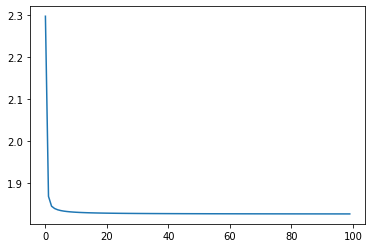

In [129]:
def split_data(data_x, data_y, train_ratio=0.6, val_ratio=0.2):
    np.random.seed(42)
    indices = np.arange(data_x.shape[0])
    np.random.shuffle(indices)
    n_train_samples = int(data_x.shape[0] * train_ratio)
    n_val_samples = int(data_x.shape[0] * val_ratio)
    train_indices = indices[:n_train_samples]
    val_indices = indices[n_train_samples:n_train_samples + n_val_samples]
    test_indices = indices[n_train_samples + n_val_samples:]
    return data_x[train_indices], data_y[train_indices], data_x[val_indices], data_y[val_indices], data_x[test_indices], data_y[test_indices]

train_x, train_y, val_x, val_y, test_x, test_y = split_data(ps5_data_x, ps5_data_y)
weight1, weight2, df = model_train(train_x, train_y, val_x, val_y, 100, 1e-2)
print("epoch with lowest val loss:", df['validation_error'].argmin())
print('Final training error', classification_error(train_x, train_y, weight1, weight2))
print('Final validation error', classification_error(val_x, val_y, weight1, weight2))
print('Final test error', classification_error(test_x, test_y, weight1, weight2))

# add code / comment below


### Question 10

For each weight $w$, obtain a random number $r$ in the range $[0.9w, 1.1w]$ and replace $w$ with $w+r$. (You will need to make $10,025$ replacements with $10,025$ random numbers.) Using these new test examples, repeat Questions~6 and 8. Comment on how your results changed.  The idea behind this question is to see how ``robust'' the neural network output is when we perturb a bit the neural network's parameters.

epoch with lowest val loss: 97
Final training error 0.5204882301656495
Final validation error 0.5445026178010471
Final test error 0.5535248041775457


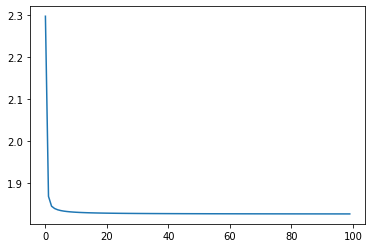

In [132]:
import random 
for weights in (ps5_theta1,ps5_theta2):
    for i, w in enumerate(weights):
        weights[i] = random.uniform(.9,1.1)*w + w
        
train_x, train_y, val_x, val_y, test_x, test_y = split_data(ps5_data_x, ps5_data_y)
weight1, weight2, df = model_train(train_x, train_y, val_x, val_y, 100, 1e-2)
print("epoch with lowest val loss:", df['validation_error'].argmin())
print('Final training error', classification_error(train_x, train_y, weight1, weight2))
print('Final validation error', classification_error(val_x, val_y, weight1, weight2))
print('Final test error', classification_error(test_x, test_y, weight1, weight2))


### Part 2: Convolutional Neural Network

**Starting from this part, you are allowed (and expected to) use PyTorch for model training and evaluation.**

In Q11, you are required to use PyTorch to perform image classification on CIFAR 10. You can acquire CIFAR 10 by running the following code.


In [92]:
cifar10_train = torchvision.datasets.CIFAR10('.', train=True, download=True, transform=torchvision.transforms.ToTensor())
cifar10_test = torchvision.datasets.CIFAR10('.', train=False, download=True, transform=torchvision.transforms.ToTensor())
print(len(cifar10_train), len(cifar10_test))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified
50000 10000


We will not directly use the full set. We will split ``cifar10_train_val`` into two datasets, a training and a validation.
The training set should contain the first 1000 images, and the validation set should contain the last 100 images. Also, for the test set,
we only keep the first 100 images for testing.

In [93]:
train_set = torch.utils.data.Subset(cifar10_train, np.arange(1000))
val_set = torch.utils.data.Subset(cifar10_train, np.arange(len(cifar10_train) - 100, len(cifar10_train)))
test_set = torch.utils.data.Subset(cifar10_test, np.arange(100))
print(len(train_set), len(val_set), len(test_set))

1000 100 100


In [94]:
pip install tfds-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 20.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 KB 23.0 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [129]:
import tensorflow as tf

from tensorflow.keras import datasets

In [130]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 8s 0us/step


### Question 11

Implement a convolutional neural network. Your network should have at least 2 convolutional layers, 1 max pooling
layer and 1 fully connected layer.

In [141]:
import seaborn as sns

In [ ]:
class ConvModel(nn.Module):
    pass  # your code here

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

### Question 12

Implement the training function. Plot training/validation loss vs. number of epochs.


In [134]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Above is the first basic model I tried out

In [135]:
model.fit(
    train_images, train_labels,
    epochs=200,
    validation_data=(test_images, test_labels),
)

2022-04-30 07:35:02.903229: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-04-30 07:35:03.670594: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/200


2022-04-30 07:35:07.147320: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


1563/1563 [==============================] - 13s 4ms/step - loss: 1.5030 - accuracy: 0.4541 - val_loss: 1.2612 - val_accuracy: 0.5546
Epoch 2/200
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1437 - accuracy: 0.5951 - val_loss: 1.1027 - val_accuracy: 0.6105
Epoch 3/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9824 - accuracy: 0.6544 - val_loss: 0.9870 - val_accuracy: 0.6543
Epoch 4/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8814 - accuracy: 0.6920 - val_loss: 0.9362 - val_accuracy: 0.6734
Epoch 5/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8090 - accuracy: 0.7176 - val_loss: 0.8863 - val_accuracy: 0.6883
Epoch 6/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7512 - accuracy: 0.7384 - val_loss: 0.8823 - val_accuracy: 0.7006
Epoch 7/200
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6944 - accuracy: 0.7566 - val_loss: 0.8856 - val_accuracy: 0.7

<AxesSubplot:>

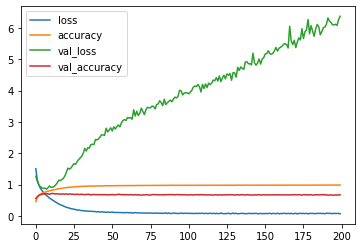

In [143]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Question 13

Bonus: include more training data for your model and/or adjusting the model architecture to build a stronger model.
Report the hyper-parameter settings you tried and the corresponding validation accuracy.

After you acquire the best model on the validation set, report the accuracy on the test set.

In [155]:


from keras.layers import GaussianNoise
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_58. Consider increasing the input size. Received input shape [None, 1, 1, 64] which would produce output shape with a zero or negative value in a dimension.

In [140]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(GaussianNoise(0.1))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(GaussianNoise(0.1))
model2.add(Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(10))
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

NameError: name 'GaussianNoise' is not defined

In [164]:
model.fit(
    train_images, train_labels,
    epochs=200,
    validation_data=(test_images, test_labels),callbacks = [callback],
)

Epoch 1/200
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9329 - accuracy: 0.2537 - val_loss: 1.6550 - val_accuracy: 0.3823
Epoch 2/200
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5717 - accuracy: 0.4222 - val_loss: 1.4378 - val_accuracy: 0.4756
Epoch 3/200
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4251 - accuracy: 0.4859 - val_loss: 1.3332 - val_accuracy: 0.5160
Epoch 4/200
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3349 - accuracy: 0.5243 - val_loss: 1.2646 - val_accuracy: 0.5484
Epoch 5/200
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2636 - accuracy: 0.5529 - val_loss: 1.3219 - val_accuracy: 0.5468
Epoch 6/200
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2092 - accuracy: 0.5767 - val_loss: 1.1427 - val_accuracy: 0.5887
Epoch 7/200
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1650 - accuracy: 0.5941 - val_loss: 1.1057 - val_ac

In [139]:
losses = pd.DataFrame(model.history.history)
losses.plot()

TypeError: no numeric data to plot

In [133]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import tensorflow as tf

In [134]:
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

This model below has the best performance. The architecture is displayed in the model summary, printed below. The loss and accuracy respectively after 125 epochs of training: [0.4184347093105316, 0.8980000019073486]

In [135]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 

mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 

batch_size = 64
 
opt_rms = tf.keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

model.evaluate(x_test, y_test, batch_size=128, verbose=1)

170508288/170498071 [==============================] - 23s 0us/step


2022-05-11 23:42:09.486964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 23:42:09.608330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 23:42:09.608695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 23:42:09.610681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 23:42:09.610980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/tmp/ipykernel_108/4150165142.py:61: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\


Epoch 1/125


2022-05-11 23:42:15.778942: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


781/781 [==============================] - 25s 27ms/step - loss: 1.8845 - accuracy: 0.4288 - val_loss: 1.3569 - val_accuracy: 0.5843 - lr: 0.0010
Epoch 2/125
781/781 [==============================] - 19s 25ms/step - loss: 1.2503 - accuracy: 0.5943 - val_loss: 1.1477 - val_accuracy: 0.6525 - lr: 0.0010
Epoch 3/125
781/781 [==============================] - 19s 25ms/step - loss: 1.0745 - accuracy: 0.6534 - val_loss: 1.0836 - val_accuracy: 0.6858 - lr: 0.0010
Epoch 4/125
781/781 [==============================] - 20s 25ms/step - loss: 0.9692 - accuracy: 0.6926 - val_loss: 0.9269 - val_accuracy: 0.7177 - lr: 0.0010
Epoch 5/125
781/781 [==============================] - 20s 26ms/step - loss: 0.9017 - accuracy: 0.7184 - val_loss: 0.8568 - val_accuracy: 0.7516 - lr: 0.0010
Epoch 6/125
781/781 [==============================] - 20s 25ms/step - loss: 0.8562 - accuracy: 0.7369 - val_loss: 0.7697 - val_accuracy: 0.7786 - lr: 0.0010
Epoch 7/125
781/781 [==============================] - 20s 25ms/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



781/781 [==============================] - 20s 25ms/step - loss: 0.5970 - accuracy: 0.8469 - val_loss: 0.6410 - val_accuracy: 0.8396 - lr: 0.0010
Epoch 52/125
781/781 [==============================] - 20s 25ms/step - loss: 0.5963 - accuracy: 0.8477 - val_loss: 0.5766 - val_accuracy: 0.8603 - lr: 0.0010
Epoch 53/125
781/781 [==============================] - 19s 25ms/step - loss: 0.5999 - accuracy: 0.8478 - val_loss: 0.6174 - val_accuracy: 0.8562 - lr: 0.0010
Epoch 54/125
781/781 [==============================] - 20s 25ms/step - loss: 0.5968 - accuracy: 0.8465 - val_loss: 0.5802 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 55/125
781/781 [==============================] - 20s 25ms/step - loss: 0.5928 - accuracy: 0.8493 - val_loss: 0.6162 - val_accuracy: 0.8499 - lr: 0.0010
Epoch 56/125
781/781 [==============================] - 20s 25ms/step - loss: 0.5925 - accuracy: 0.8487 - val_loss: 0.6452 - val_accuracy: 0.8453 - lr: 0.0010
Epoch 57/125
781/781 [==============================] - 20s

[0.4184347093105316, 0.8980000019073486]

In [136]:
model


In [137]:
model.history.history

{}